In [ ]:
import xarray as xr
import xclim
from distributed import Client
from dask import array
import zarr

In [ ]:
client = Client(n_workers=4, threads_per_worker=2, memory_limit="2GB")
client

In [ ]:
HURS_PATH = "/Users/ericcollins/climate-risk-map-hazards/Wildfire/FWI/input/hurs_day_CESM2_ssp126_r4i1p1f1_gn_2030_v1.1.nc"
PR_PATH = "/Users/ericcollins/climate-risk-map-hazards/Wildfire/FWI/input/pr_day_CESM2_ssp126_r4i1p1f1_gn_2030_v1.1.nc"
TAS_PATH = "/Users/ericcollins/climate-risk-map-hazards/Wildfire/FWI/input/tas_day_CESM2_ssp126_r4i1p1f1_gn_2030.nc"
SFC_WIND_PATH = "/Users/ericcollins/climate-risk-map-hazards/Wildfire/FWI/input/sfcWind_day_CESM2_ssp126_r4i1p1f1_gn_2030.nc"

In [ ]:
# Open the dataset
ds = xr.open_mfdataset(paths=[HURS_PATH, PR_PATH, TAS_PATH, SFC_WIND_PATH])

# Specify the rechunking - make the time dimension contiguous
target_chunks = {'time': -1, "lat": "auto", "lon": "auto"}  # Use -1 to make 'time' a single chunk
rechunked = ds.chunk(target_chunks)

# Save to Zarr for efficient rechunking
zarr_store = "output_rechunked.zarr"
rechunked.to_zarr(zarr_store, mode='w')

In [ ]:
# Open the dataset
ds = xr.open_mfdataset(paths=[HURS_PATH, PR_PATH, TAS_PATH, SFC_WIND_PATH])

# Specify the rechunking - make the time dimension contiguous
target_chunks = {'time': -1, "lat": 5, "lon": 12}  # Use -1 to make 'time' a single chunk
rechunked = ds.chunk(target_chunks)

# Save to Zarr for efficient rechunking
zarr_store = "output_rechunked_2.zarr"
rechunked.to_zarr(zarr_store, mode='w')

In [ ]:
# Open the dataset
ds = xr.open_mfdataset(paths=[HURS_PATH, PR_PATH, TAS_PATH, SFC_WIND_PATH])

# Specify the rechunking - make the time dimension contiguous
target_chunks = {'time': -1, "lat": 15, "lon": 36}  # Use -1 to make 'time' a single chunk
rechunked = ds.chunk(target_chunks)

# Save to Zarr for efficient rechunking
zarr_store = "output_rechunked_3.zarr"
rechunked.to_zarr(zarr_store, mode='w')

In [ ]:
# Open the dataset
ds = xr.open_mfdataset(paths=[HURS_PATH, PR_PATH, TAS_PATH, SFC_WIND_PATH])

# Specify the rechunking - make the time dimension contiguous
target_chunks = {'time': -1, "lat": 25, "lon": 60}  # Use -1 to make 'time' a single chunk
rechunked = ds.chunk(target_chunks)

# Save to Zarr for efficient rechunking
zarr_store = "output_rechunked_4.zarr"
rechunked.to_zarr(zarr_store, mode='w')

In [ ]:
# Combined dataset
ds = xr.open_zarr("output_rechunked.zarr")
out_fwi = xclim.indicators.atmos.cffwis_indices(
        tas=ds.tas,
        pr=ds.pr,
        hurs=ds.hurs,
        sfcWind=ds.sfcWind,
        lat=ds.lat,
        #season_mask=season_mask,
        season_method = None,
        #dry_start = None,
        #initial_start_up = False,
        overwintering=False,
    )

names = ['dc','dmc','ffmc','isi','bui','fwi']
da_out = xr.Dataset({name: da for name, da in zip(names, out_fwi)})
da_out.compute()

In [27]:
ds = xr.open_dataset("s3://uw-crl/scratch/18521741447039926123664292042305730282.zarr/", engine='zarr')

/Users/ericcollins/opt/miniconda3/envs/xclim/lib/python3.12/site-packages/xarray/backends/api.py:611: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  backend_ds = backend.open_dataset(


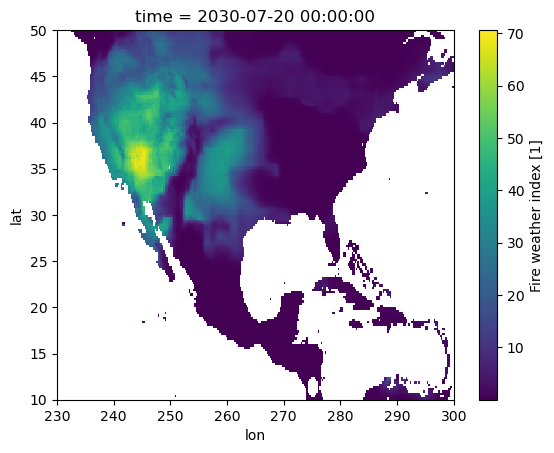

In [28]:
ds.isel(time=200).fwi.plot()

In [26]:
ds.isel(time=200).max()

<xarray.Dataset> Size: 16B
Dimensions:  ()
Coordinates:
    time     object 8B 2030-07-20 00:00:00
Data variables:
    fwi      float64 8B 111.6